# Корреляция Пирсона

In [1]:
import pandas as pd
import numpy as np

## Foodmart product sales 

In [2]:
sales = pd.read_csv('data/foodmart.sales.tsv', sep = '\t', header = 0, parse_dates = [2])

In [5]:
sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [8]:
products = pd.read_csv('data/foodmart.products.tsv', sep = '\t', header = 0)

In [9]:
products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [10]:
sales = sales.merge(products[['product_id', 'product_name']], 
                    on = ['product_id'], how = 'inner')

In [11]:
sales.head()

,product_id,store_id,date,sales,product_name
0,4,6,1997-01-01,4,Washington Cream Soda
1,4,7,1997-01-05,3,Washington Cream Soda
2,4,6,1997-01-06,2,Washington Cream Soda
3,4,17,1997-01-11,2,Washington Cream Soda
4,4,24,1997-01-11,2,Washington Cream Soda


## Взаимное влияние продуктов друг на друга

In [12]:
sparse_sales = pd.pivot_table(sales, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)

In [15]:
sparse_sales.head()

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                           0               0   
           14                          0               0   
1997-01-02 11                          0               0   
           23                          0               0   
1997-01-03 7                           0               0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                  0                      0   
           14                                 0                      0   
1997-01-02 11                                 0                      0   
           23                                 0                      0   
1997-01-03 7                                  0                      0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                                 0                   0   
           14                                0                   0   
1997-01-02 11                                0                   0   
           23                                0                   0   
1997-01-03 7                                 0                   0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                            0                            0   
           14                           0                            0   
1997-01-02 11                           0                            0   
           23                           0                            0   
1997-01-03 7                            0                            0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                                0                           0   
           14                               0                           0   
1997-01-02 11                               0                           0   
           23                               0                           0   
1997-01-03 7                                0                           0   

product_name                    ...               Washington Apple Juice  \
date       store_id             ...                                        
1997-01-01 6                    ...                                    0   
           14                   ...                                    0   
1997-01-02 11                   ...                                    0   
           23                   ...                                    0   
1997-01-03 7                    ...                                    0   

product_name         Washington Berry Juice  Washington Cola  \
date       store_id                                            
1997-01-01 6                              0                0   
           14                             0                0   
1997-01-02 11                             0                0   
           23                             0                0   
1997-01-03 7                              4                0   

product_name         Washington Cranberry Juice  Washington Cream Soda  \
date       store_id                                                      
1997-01-01 6                                  0                      4   
           14                                 0                      0   
1997-01-02 11                                 0                      0   
           23                                 0                      0   
1997-01-03 7                                  0                      0   

product_n

In [17]:
sales_correlation = sparse_sales.corr()

In [18]:
sales_correlation.head()

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498


In [31]:
sales_correlation[['American Chicken Hot Dogs']].sort_values(
    by='American Chicken Hot Dogs', ascending = True).head()

product_name,American Chicken Hot Dogs
product_name,
Lake Pimento Loaf,-0.065509
Fast Low Fat Chips,-0.061037
PigTail Frozen Sausage Pizza,-0.058960
Plato Decaf Coffee,-0.058481
Kiwi Lox,-0.057037


In [27]:
min_corr = pd.DataFrame(sales_correlation.min())
min_corr.columns = ['min']
min_corr.sort_values(by = 'min').head()

,min
product_name,
Carlson Whole Milk,-0.085064
Pearl Chardonnay Wine,-0.085064
Gulf Coast Malted Milk Balls,-0.082598
Sunset Economy Toilet Brush,-0.082598
Fast Fudge Brownies,-0.082317


In [33]:
max_corr = pd.DataFrame(sales_correlation.apply(lambda x: 
    np.max(list(filter(lambda x : x != 1., x))), axis = 1))
max_corr.columns = ['max']
max_corr.sort_values(by = 'max', ascending = False).head()

,max
product_name,
Plato French Roast Coffee,0.340598
Just Right Vegetable Soup,0.340598
Nationeel Grape Fruit Roll,0.322176
Great Muffins,0.322176
Club Low Fat Cottage Cheese,0.306701


In [34]:
product_name = 'Plato French Roast Coffee'
sales_correlation[[product_name]].sort_values(
    product_name, ascending = False).head()

product_name,Plato French Roast Coffee
product_name,
Plato French Roast Coffee,1.000000
Just Right Vegetable Soup,0.340598
Hermanos Macintosh Apples,0.289095
Tell Tale Macintosh Apples,0.273905
Consolidated Whitening Toothpast,0.247477


___
# Practice Quiz. Q4:
Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

In [35]:
df = pd.read_csv('data/illiteracy.txt', sep='\t')
df.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [37]:
df[['Illit', 'Births']].corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [38]:
df[['Illit', 'Births']].corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


In [39]:
import matplotlib.pyplot as plt

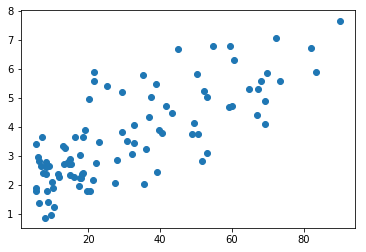

In [43]:
plt.scatter(df['Illit'].values, df['Births'].values);

In [47]:
df.sort_values(by='Births', ascending=False).head()

,Country,Illit,Births
63,Niger,90.2,7.67
34,Guinea-Bissau,72.4,7.08
11,Burundi,54.8,6.80
49,Liberia,59.5,6.78
55,Mali,82.0,6.72
